<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. MACHINE LEARNING

## 5.1 Loyiha qadamlari
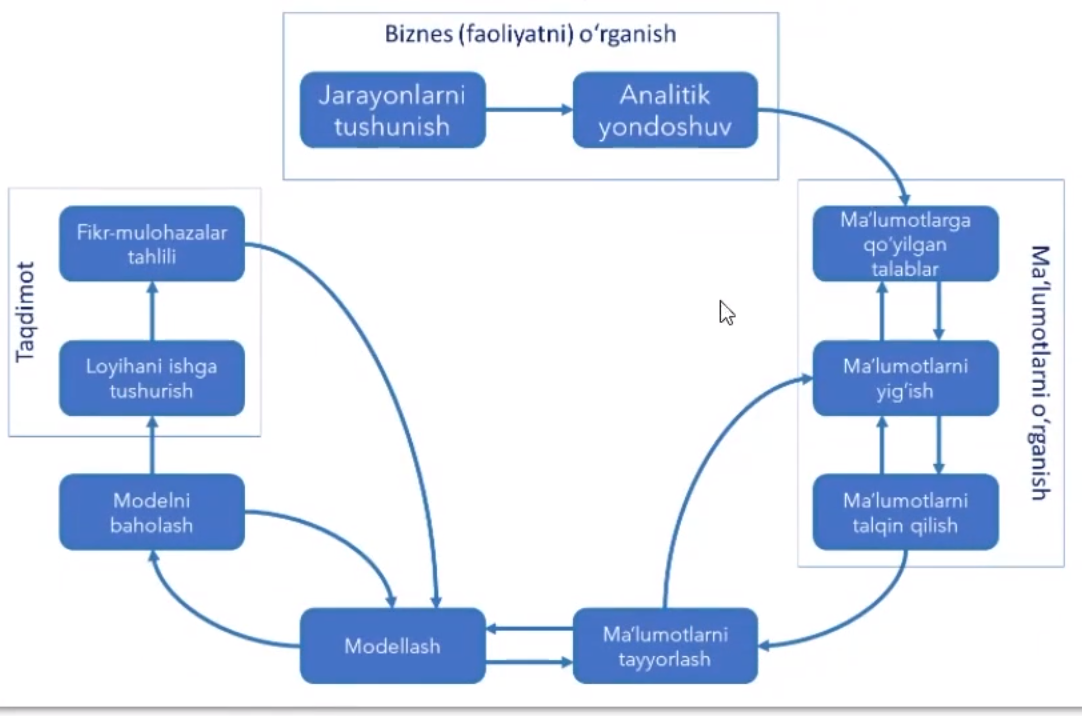



In [2]:
import pandas as pd
import numpy as np
import sklearn  # scikit-leaarn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'http://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


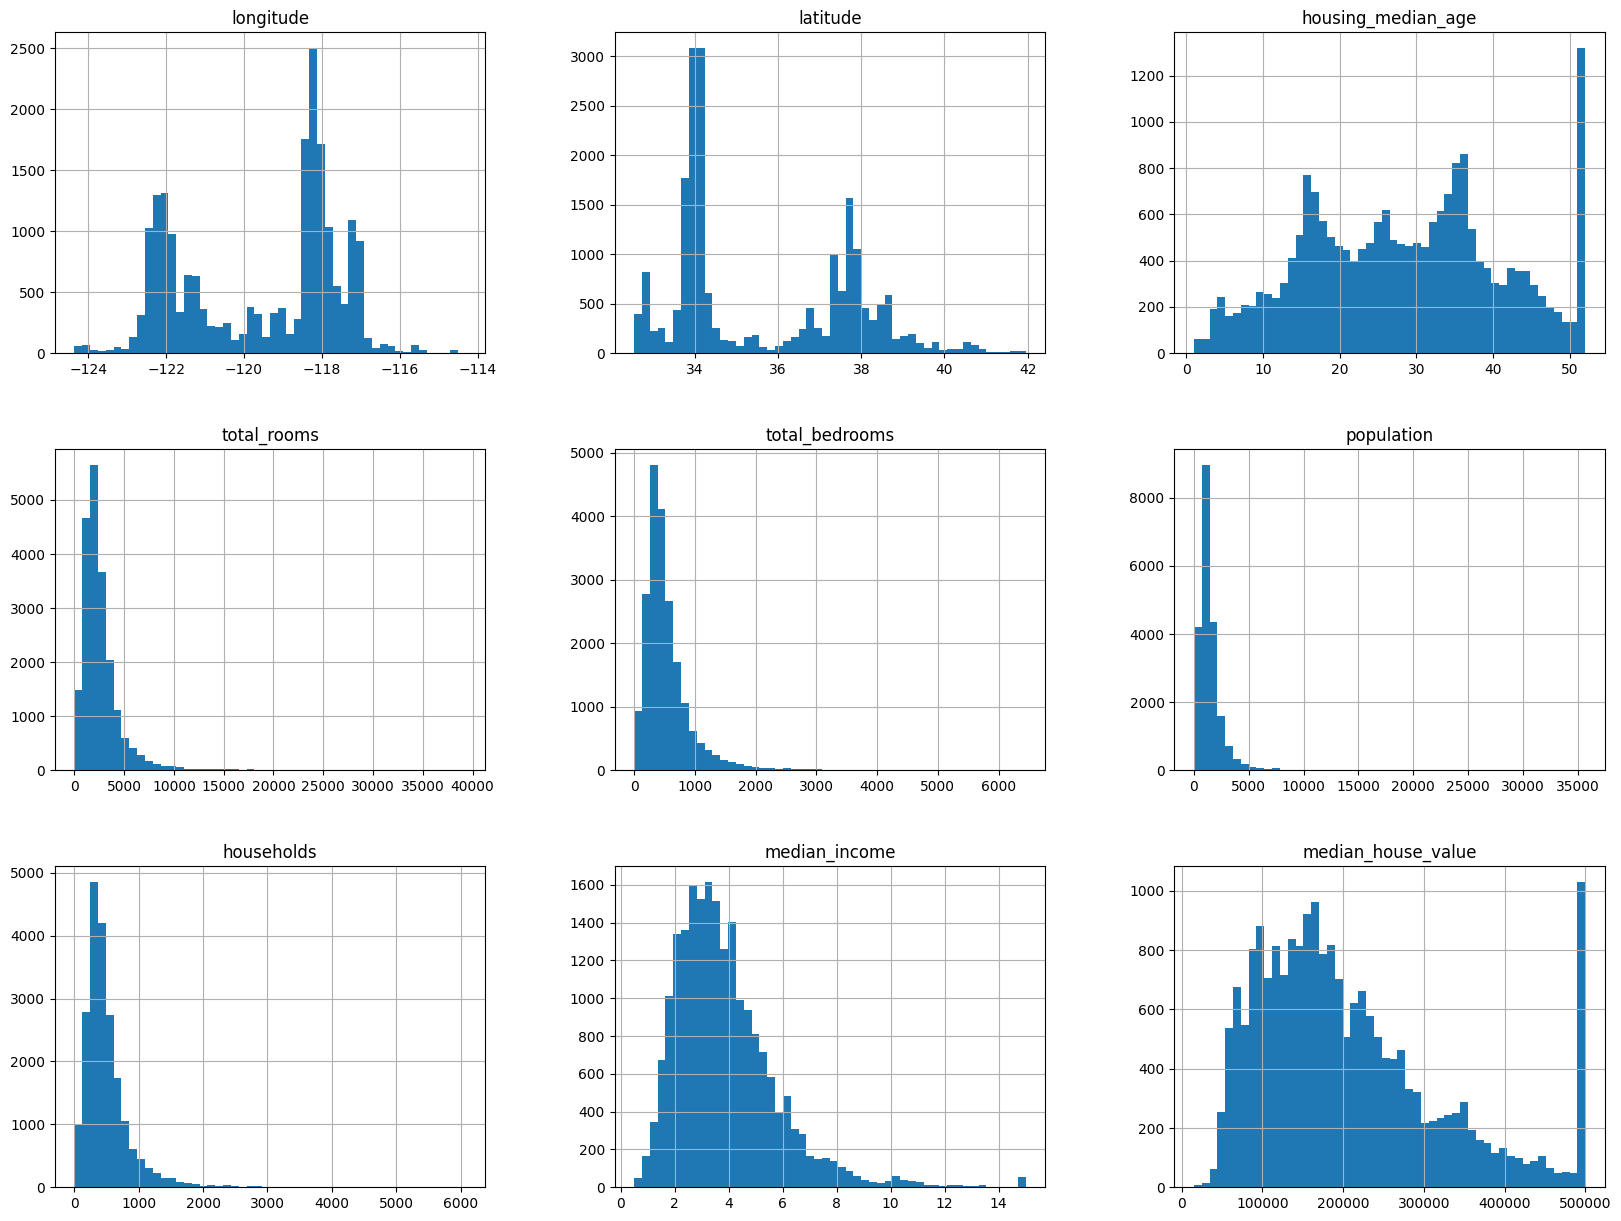

In [11]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

#Ma’lumotlarni o’rganish. Train va test set

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=30)

In [14]:
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND
1906,-120.02,38.76,15.0,3142.0,618.0,725.0,285.0,4.3333,121400.0,INLAND
13556,-117.31,34.10,28.0,2899.0,755.0,2406.0,655.0,1.5208,69500.0,INLAND
9630,-121.00,37.26,45.0,1750.0,371.0,847.0,354.0,1.7062,77400.0,INLAND
18912,-122.24,38.15,10.0,6817.0,1188.0,4163.0,1135.0,4.4529,144100.0,NEAR BAY
2185,-119.98,36.74,26.0,1453.0,251.0,896.0,260.0,3.4861,112500.0,INLAND
